In [2]:
pip install -U scikit-learn scipy matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
alzheimer_disease_df = pd.read_csv('/home/student/alzheimer_disease_data.csv', nrows=10000)

#### #Extract categorical columns from the dataframe
Here we extract the columns with object datatype as they are the categorical columns

In [6]:
categorical_columns = alzheimer_disease_df.select_dtypes(include=['object']).columns.tolist()

In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    alzheimer_disease_df[column] = label_encoder.fit_transform(alzheimer_disease_df[column])

In [20]:
# Display the resulting dataframe
print(f"Encoded Employee data : \n{alzheimer_disease_df}")

Encoded Employee data : 
      RowId  YearStart  YearEnd  LocationAbbr  LocationDesc  Datasource  \
0      1179       2022     2022            41            41           0   
1      1260       2022     2022            45            46           0   
2       442       2022     2022            14            13           0   
3       668       2022     2022            21            21           0   
4      1492       2022     2022            56            57           0   
...     ...        ...      ...           ...           ...         ...   
9995    929       2022     2022            32            31           0   
9996    117       2022     2022             1             0           0   
9997   1148       2022     2022            39            39           0   
9998    531       2022     2022            13            16           0   
9999    268       2022     2022             5             5           0   

      Class  Topic  Question  Data_Value_Unit  ...  Stratification2  \
0  

In [37]:
alzheimer_disease_df.isnull().sum()

RowId                         0
YearStart                     0
YearEnd                       0
LocationAbbr                  0
LocationDesc                  0
Datasource                    0
Class                         0
Topic                         0
Question                      0
Data_Value_Unit               0
DataValueTypeID               0
Data_Value_Type               0
Data_Value                    0
Data_Value_Alt                0
Data_Value_Footnote_Symbol    0
Data_Value_Footnote           0
Low_Confidence_Limit          0
High_Confidence_Limit         0
StratificationCategory1       0
Stratification1               0
StratificationCategory2       0
Stratification2               0
Geolocation                   0
ClassID                       0
TopicID                       0
QuestionID                    0
LocationID                    0
StratificationCategoryID1     0
StratificationID1             0
StratificationCategoryID2     0
StratificationID2             0
dtype: i

In [16]:
# pip install scikit-learn

In [18]:
# Calculate the mean of the Data_Value column
mean_value = alzheimer_disease_df['Data_Value'].mean()

# Fill empty cells with the mean value by assigning back to the column
alzheimer_disease_df['Data_Value'] = alzheimer_disease_df['Data_Value'].fillna(mean_value)

In [36]:
# Forward fill and backward fill to fill missing values in Data_Value_Alt
alzheimer_disease_df['Data_Value_Alt'] = alzheimer_disease_df.groupby('Topic')['Data_Value_Alt'].transform(
    lambda x: x.ffill().bfill()
)

In [31]:
alzheimer_disease_df['Low_Confidence_Limit'] = alzheimer_disease_df['Low_Confidence_Limit'].fillna(alzheimer_disease_df['Low_Confidence_Limit'].quantile(0.25))

In [34]:
alzheimer_disease_df['High_Confidence_Limit'] = alzheimer_disease_df['High_Confidence_Limit'].fillna(alzheimer_disease_df['High_Confidence_Limit'].quantile(0.25))

#### Renaming Columns

In [53]:
# Define a dictionary mapping old column names to new column names
new_column_names = {
    'RowId': 'row_id',
    'YearStart': 'year_start',
    'YearEnd': 'year_end',
    'LocationAbbr': 'location_abbr',
    'LocationDesc': 'location',
    'Datasource': 'datasource',
    'Class': 'classification',
    'Topic': 'topic',
    'Question': 'question',
    'Data_Value_Unit': 'data_value_unit',
    'DataValueTypeID': 'data_value_type_id',
    'Data_Value_Type': 'data_value_type',
    'Data_Value': 'data_value',
    'Data_Value_Alt': 'data_value_alt',
    'Data_Value_Footnote_Symbol': 'data_value_footnote_symbol',
    'Data_Value_Footnote': 'data_value_footnote',
    'Low_Confidence_Limit': 'low_confidence_limit',
    'High_Confidence_Limit': 'high_confidence_limit',
    'StratificationCategory1': 'stratification_category_1',
    'Stratification1': 'stratification_1',
    'StratificationCategory2': 'stratification_category_2',
    'Stratification2': 'stratification_2',
    'Geolocation': 'geolocation',
    'ClassID': 'class_id',
    'TopicID': 'topic_id',
    'QuestionID': 'question_id',
    'LocationID': 'location_id',
    'StratificationCategoryID1': 'stratification_category_id_1',
    'StratificationID1': 'stratification_id_1',
    'StratificationCategoryID2': 'stratification_category_id_2',
    'StratificationID2': 'stratification_id_2'
}

# Rename the columns
alzheimer_disease_df.rename(columns=new_column_names, inplace=True)


In [43]:
def reduce_cardinality(alzheimer_disease_df, column, threshold):
    freq = alzheimer_disease_df[column].value_counts(normalize=True)
    keep_categories = freq[freq.cumsum() <= threshold].index.tolist()
    alzheimer_disease_df[column] = alzheimer_disease_df[column].where(alzheimer_disease_df[column].isin(keep_categories), 'Other')
    return alzheimer_disease_df

In [48]:
def reduce_cardinality(df, column, threshold):
    freq = df[column].value_counts(normalize=True)
    keep_categories = freq[freq.cumsum() <= threshold].index.tolist()
    df[column] = df[column].where(df[column].isin(keep_categories), 'Other')
    return df

# Set the threshold
threshold = 0.8  # 80% threshold

# Update the function calls with the correct column names
df_reduced = reduce_cardinality(alzheimer_disease_df, 'location_abbr', threshold)
# print(df_reduced['location_abbr'].value_counts())

df_reduced = reduce_cardinality(df_reduced, 'class', threshold)  # Adjust to the correct column name
df_reduced = reduce_cardinality(df_reduced, 'topic', threshold)  # Adjust to the correct column name

             row_id    year_start      year_end  location_desc  datasource  \
count  10000.000000  10000.000000  10000.000000   10000.000000     10000.0   
mean     855.764700   2021.975400   2021.983600      28.110800         0.0   
std      448.983866      0.295302      0.260649      16.993564         0.0   
min        0.000000   2015.000000   2015.000000       0.000000         0.0   
25%      469.000000   2022.000000   2022.000000      14.000000         0.0   
50%      852.000000   2022.000000   2022.000000      28.000000         0.0   
75%     1242.000000   2022.000000   2022.000000      43.000000         0.0   
max     1658.000000   2022.000000   2022.000000      58.000000         0.0   

           question  data_value_unit  data_value_type_id  data_value_type  \
count  10000.000000     10000.000000        10000.000000     10000.000000   
mean      11.456800         0.002400            0.997600         0.997600   
std        7.687915         0.048933            0.048933         0

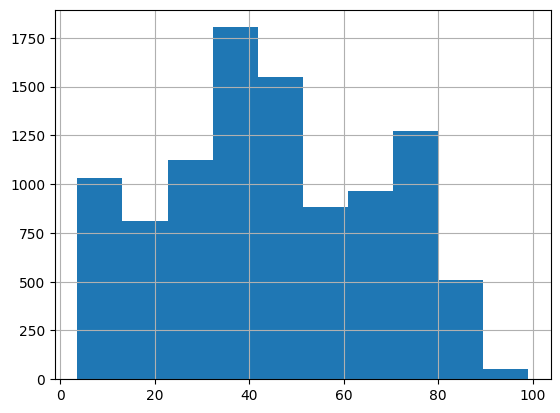

In [49]:
# Example: Descriptive statistics
print(df_reduced.describe())

# Example: Data visualization (requires additional libraries)
df_reduced['data_value_alt'].hist()
plt.show()

In [58]:
# Define the threshold for grouping rare categories
threshold = 50  # Adjust based on your dataset

# Determine the frequency of each location
location_counts = alzheimer_disease_df['location_desc'].value_counts()

# Identify locations that occur below the threshold
rare_locations = location_counts[location_counts < threshold].index

# Replace rare locations with 'Other'
alzheimer_disease_df['location_desc'] = alzheimer_disease_df['location_desc'].replace(rare_locations, 'Other')

In [56]:
print(alzheimer_disease_df.columns)

Index(['row_id', 'year_start', 'year_end', 'location_abbr', 'location_desc',
       'datasource', 'class', 'topic', 'question', 'data_value_unit',
       'data_value_type_id', 'data_value_type', 'data_value', 'data_value_alt',
       'data_value_footnote_symbol', 'data_value_footnote',
       'low_confidence_limit', 'high_confidence_limit',
       'stratification_category_1', 'stratification_1',
       'stratification_category_2', 'stratification_2', 'geolocation',
       'class_id', 'topic_id', 'question_id', 'location_id',
       'stratification_category_id_1', 'stratification_id_1',
       'stratification_category_id_2', 'stratification_id_2'],
      dtype='object')


In [60]:
# Identify rare locations
rare_locations = location_counts[location_counts < threshold].index

# Replace rare locations with 'Other'
alzheimer_disease_df['location_desc'] = alzheimer_disease_df['location_desc'].apply(lambda x: 'Other' if x in rare_locations else x)

In [62]:
# Verify changes
print("\nUnique values in 'location' after grouping rare categories:")
# print(alzheimer_disease_df['location_desc'].value_counts())


Unique values in 'location' after grouping rare categories:


In [63]:
# **2. Feature Binning**

# Define bins and labels for 'data_value'
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

In [64]:
# Apply binning to 'data_value'
alzheimer_disease_df['data_value_binned'] = pd.cut(alzheimer_disease_df['data_value'], bins=bins, labels=labels, include_lowest=True)

In [65]:
# Verify binning
print("\nUnique values in 'data_value_binned':")
print(alzheimer_disease_df['data_value_binned'].value_counts())


Unique values in 'data_value_binned':
data_value_binned
41-50     4678
31-40     1146
71-80      901
11-20      704
61-70      622
51-60      600
21-30      597
81-90      376
0-10       349
91-100      27
Name: count, dtype: int64


In [66]:
# **3. Combining Similar Categories**

# Define mapping for combining categories in 'classification'
classification_mapping = {
    2: 'Category1',  # Example mapping: combining categories 2 and 3 into 'Category1'
    3: 'Category1',
    4: 'Category2',  # Example: combining categories 4 and 5 into 'Category2'
    5: 'Category2'
    # Add more mappings as needed
}

In [68]:
# Apply the mapping
alzheimer_disease_df['class'] = alzheimer_disease_df['class'].map(classification_mapping).fillna(alzheimer_disease_df['class'])

# Verify changes
print("\nUnique values in 'class' after combining categories:")
print(alzheimer_disease_df['class'].value_counts())

# Save the transformed dataset
alzheimer_disease_df.to_csv('transformed_dataset.csv', index=False)

print("\nTransformed dataset saved as 'transformed_dataset.csv'")


Unique values in 'class' after combining categories:
class
Category2    7876
Other        2124
Name: count, dtype: int64

Transformed dataset saved as 'transformed_dataset.csv'


In [71]:
# ORDINAL ENCODING
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
alzheimer_disease_df['ordinal_encoded'] = oe.fit_transform(alzheimer_disease_df[['location_desc']])
 
# Aggregate counts for each location type
location_counts = alzheimer_disease_df['class'].value_counts()

In [72]:
# Combine less common categories into 'Other'
threshold = 2  # Define a threshold for what counts as "less common"
common_locations = location_counts[location_counts >= threshold]
other_locations = location_counts[location_counts < threshold]
# combined_counts = pd.concat([common_locations, pd.Series({'Other': other_locations.sum()})])

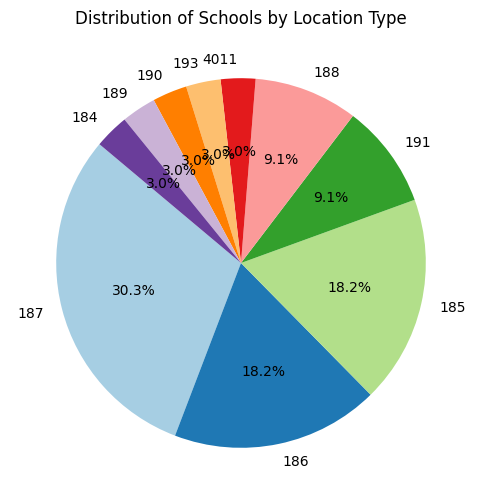

In [84]:
# Define the threshold for grouping rare categories
threshold = 50  # Adjust based on your dataset

# Determine the frequency of each location
location_counts = alzheimer_disease_df['location_abbr'].value_counts()

# Combine rare categories
combined_counts = location_counts.copy()
combined_counts[combined_counts < threshold] = 'Other'  # Mark rare categories as 'Other'

# Count the occurrences of 'Other' and other categories
final_counts = combined_counts.value_counts()

# Create the pie chart
plt.figure(figsize=(12, 6))
plt.pie(final_counts, labels=final_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(final_counts))))
plt.title('Distribution of Schools by Location Type')
plt.show()

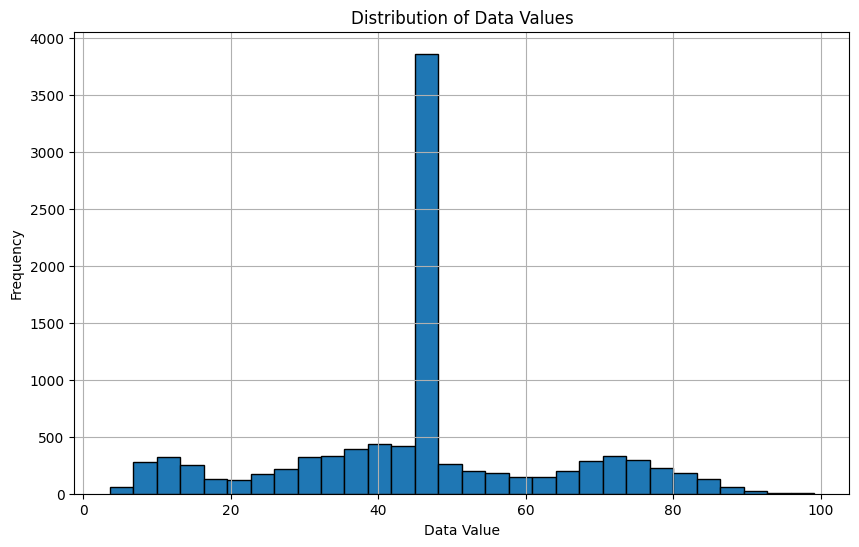

In [76]:
# Plot histogram for 'data_value'
plt.figure(figsize=(10, 6))
plt.hist(alzheimer_disease_df['data_value'].dropna(), bins=30, edgecolor='k')
plt.title('Distribution of Data Values')
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

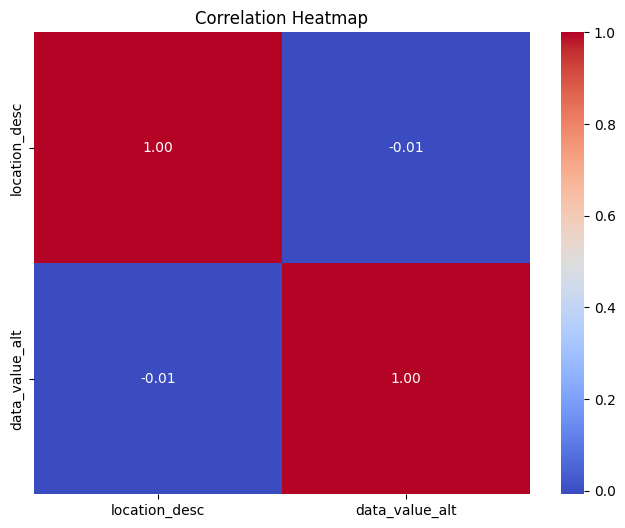

In [80]:
# Calculate the correlation matrix
corr_matrix = alzheimer_disease_df[['location_desc', 'data_value_alt']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

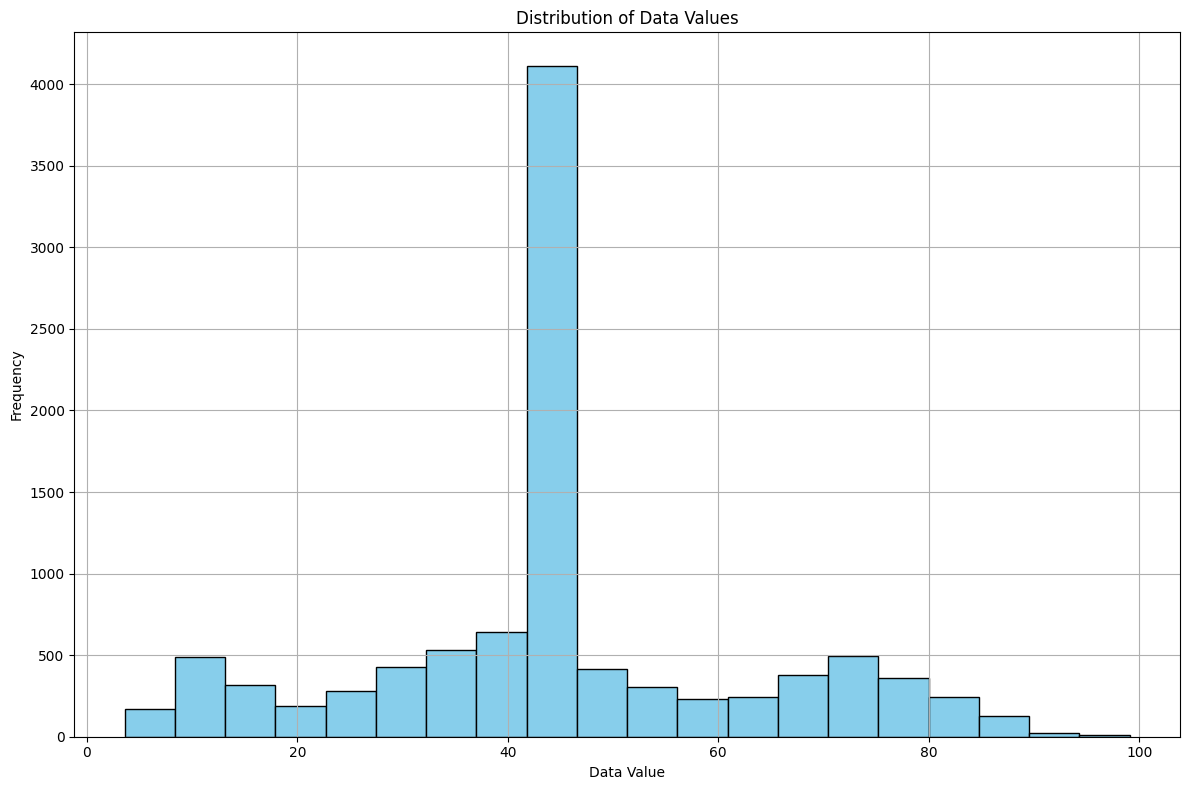

In [81]:
# Plotting a histogram of the 'Data_Value' column
plt.figure(figsize=(12, 8))
plt.hist(alzheimer_disease_df['data_value'].dropna(), bins=20, edgecolor='black', color='skyblue')  # Adjust bins as needed
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.title('Distribution of Data Values')
plt.grid(True)
plt.tight_layout()
plt.show()

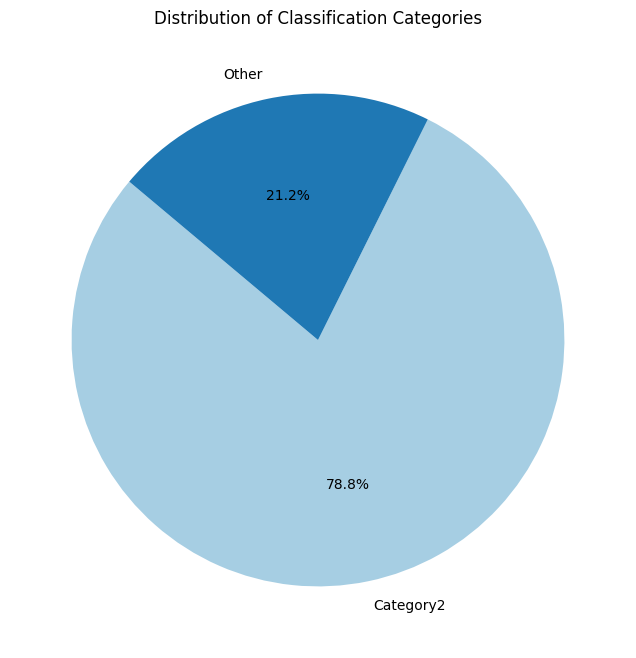

In [82]:

alzheimer_disease_df = pd.DataFrame(alzheimer_disease_df)

# Aggregate counts for the 'classification' column
classification_counts = alzheimer_disease_df['class'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(classification_counts, labels=classification_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(classification_counts))))
plt.title('Distribution of Classification Categories')
plt.show()
